### My attempt: goal to plot EM probability for pi+ and pi0, normalized histo

In [173]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
#import libraries and some constants

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats

# metadata
layers = ["EMB1", "EMB2", "EMB3", "TileBar0", "TileBar1", "TileBar2"]#calorimeter layer names, B=barrel, EM = for EM showers, Tile=hadronic
cell_size_phi = [0.098, 0.0245, 0.0245, 0.1, 0.1, 0.1]#cell dimensions in these units
cell_size_eta = [0.0031, 0.025, 0.05, 0.1, 0.1, 0.2]
len_phi = [4, 16, 16, 4, 4, 4] #'image sizes' in phi/eta coords
len_eta = [128, 16, 8, 4, 4, 2]

In [3]:
import atlas_mpl_style as ampl #makes matplotlib follow atlas formal style
ampl.use_atlas_style()
# plt.style.use('print')
plotpath = '/home/kaelaekd/start_tf/LCStudies/clusters/Plots/'

In [4]:
# import our resolution utilities

import sys
sys.path.append('/home/kaelaekd/start_tf/LCStudies')
from  util import resolution_util as ru
from  util import plot_util as pu

import uproot as ur
import pandas as pd

In [159]:
path = '/fast_scratch/atlas_images/v7/'

branches = ['clusterIndex', 'truthE', 'nCluster', 'clusterE', 'clusterECalib', 'clusterPt', 'clusterEta', 'clusterPhi', 'cluster_nCells', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_DEAD_TOT', 'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_CENTER_MAG', 'cluster_FIRST_ENG_DENS', 'cluster_cellE_norm']
# centermag = depth, engdens = density, can plot like fig 10
#single particle simulation so just pi+, see how detector reacts, one shower, single pion
pp_file = ur.open(path+'piplus.root') #uproot! play with these. acts like a dictionary 
pp_tree = pp_file['ClusterTree']
pp = pd.DataFrame(pp_tree.arrays(expressions = branches, library='np')) #branches are numpy arrays, transform to dataframe

In [158]:
pp_tree.arrays(library='np')

{'runNumber': array([284500, 284500, 284500, ..., 284500, 284500, 284500], dtype=int32),
 'eventNumber': array([   273,    273,    273, ..., 409215, 409403, 409403], dtype=int32),
 'truthE': array([1950.7268  , 1950.7268  , 1950.7268  , ...,   55.948166,
           8.780014,    8.780014], dtype=float32),
 'truthPt': array([1587.2461   , 1587.2461   , 1587.2461   , ...,   45.534573 ,
           7.5605025,    7.5605025], dtype=float32),
 'truthEta': array([ 0.66446656,  0.66446656,  0.66446656, ...,  0.6640351 ,
        -0.56036055, -0.56036055], dtype=float32),
 'truthPhi': array([-2.1144016, -2.1144016, -2.1144016, ..., -0.8578948, -3.0305486,
        -3.0305486], dtype=float32),
 'clusterIndex': array([0, 1, 2, ..., 0, 0, 1], dtype=int32),
 'nCluster': array([3, 3, 3, ..., 1, 2, 2], dtype=int32),
 'clusterE': array([1.7065892e+03, 5.8192909e+01, 3.4919021e-01, ..., 4.1322838e+01,
        5.6369462e+00, 1.3290558e+00], dtype=float32),
 'clusterECalib': array([1.8475732e+03, 7.8681816e+

In [24]:
pp

,clusterIndex,truthE,nCluster,clusterE,clusterECalib,clusterPt,clusterEta,clusterPhi,cluster_nCells,cluster_sumCellE,cluster_ENG_CALIB_TOT,cluster_ENG_CALIB_OUT_T,cluster_ENG_CALIB_DEAD_TOT,cluster_EM_PROBABILITY,cluster_HAD_WEIGHT,cluster_CENTER_MAG,cluster_FIRST_ENG_DENS,cluster_cellE_norm
0,0,1950.726807,3,1706.589233,1847.573242,1393.735718,0.658092,-2.112122,353,1705.227661,1790.404785,7.076038,44.067638,0.018130,1.024731,2423.317871,4.277404e-07,"[0.31853524, 0.0076545365, 0.25650582, 0.02611..."
1,1,1950.726807,3,58.192909,78.681816,46.815140,0.683789,-2.178753,45,54.173908,73.329506,0.755510,11.988488,0.001000,1.191867,3425.696777,1.755061e-10,"[0.027513273, 0.0021719737, 0.0013425057, 0.00..."
2,2,1950.726807,3,0.349190,0.769498,0.315112,0.460979,-2.405282,2,0.285924,0.259033,0.692205,0.078698,0.000623,1.212510,3913.996338,1.603220e-12,"[0.6538643, 0.18118072, 0.16495493]"
3,0,18.619093,2,11.992596,21.729856,11.850097,0.154927,-1.119611,33,11.971533,12.955562,1.463615,2.499960,0.006570,1.167025,2252.051270,8.310836e-10,"[0.16594508, 0.0015814339, 0.05095686, 0.01340..."
4,1,18.619093,2,0.398268,0.827007,0.393829,0.150000,-0.932660,1,0.398268,0.116087,0.330997,0.014711,0.003600,1.109439,3054.038818,5.170689e-12,[1.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435962,1,12.444592,2,2.249070,6.352647,2.230844,-0.127740,1.087620,15,2.243600,2.199819,0.598546,0.456210,0.007869,1.333571,2330.671387,3.774810e-10,"[0.23387866, 0.008866438, 0.006691358, 0.00268..."
435963,0,13.728332,1,13.441289,18.162279,10.837882,-0.679954,-0.456889,19,13.442112,13.156881,0.301558,0.090284,0.000505,1.197136,3435.510254,8.101688e-11,"[0.49174085, 0.060185365, 0.010226395, 0.02072..."
435964,0,55.948166,1,41.322838,55.096611,34.028568,0.643597,-0.854183,74,41.298710,46.812019,3.952286,3.498916,0.001304,1.143205,2832.557129,1.299032e-09,"[0.101409234, 0.007867423, 0.07660544, 0.00523..."
435965,0,8.780014,2,5.636946,6.648877,4.833791,-0.568765,-3.092654,30,5.601835,5.677196,0.750147,0.233764,0.823102,1.032151,1964.757446,2.271775e-09,"[0.2748373, 0.005323416, 0.045132488, 0.155698..."


What are all the parameters in branches?

clusterIndex: gives order of the cluster in the event (i.e. high or low E)

truthE: truth energy of the original pion, not well defined

nCluster: number of clusters per that event

clusterE: measured E of cluster

clusterECalib: cluster E of hadronic component + out of cluster contribution + dead material contribution

clusterPt: transverse momentum of the cluster (?)

clusterEta: eta direction of cluster

clusterPhi: phi direction of cluster

cluster_nCells: number of cells associated with the cluster

cluster_sumCellE: should be close to clusterE, basically same, differs due to truncation

cluster_ENG_CALIB_TOT: truth deposited energy (i.e. only E deposited in that loc'n since other E is lost before arriving recall). Calibration hits total E, i.e. hits used for calibration.

cluster_ENG_CALIB_OUT_T: energy of the out-of-cluster true signal cells associated with the cluster

cluster_ENG_CALIB_DEAD_TOT: dead material energy correction for signal lost between cal cells associated with the cluster

cluster_EM_PROBABILITY: 0-1 probability the given cluster is associated with an EM shower (<.5 => hadronic shower)

cluster_HAD_WEIGHT: hadronic signal calibration weight (?)

cluster_CENTER_MAG: cluster depth!

cluster_FIRST_ENG_DENS: normalized cluster signal density (normalized by energy)

cluster_cellE_norm: fraction of cluster E of each cell (?)

### setup

In [88]:
#get events with just one cluster or subleading clusters
pp_Single = pp[pp.nCluster==1] #select incidences of one cluster per event. handy pd trick! boolean! t/f for each entry
pp_Multi = pp[(pp.nCluster>1) & (pp.clusterIndex!=0)] #clusterIndex -> order of cluster in event (high/low E)
pp_Leading = pp[(pp.nCluster>1) & (pp.clusterIndex==0)]

pp['clusterEoverCalib'] = pp.clusterE / pp.cluster_ENG_CALIB_TOT 
pp['clusterEoverTruth'] = pp.clusterE / pp.truthE 

pp_small = pp[:10]

In [13]:
p0_file = ur.open(path+'pi0.root')
p0_tree = p0_file['ClusterTree']
p0 = pd.DataFrame(p0_tree.arrays(expressions = branches, library='np'))

In [17]:
p0['clusterEoverCalib'] = p0.clusterE / p0.cluster_ENG_CALIB_TOT

p0_Single = p0[p0.nCluster==1]
p0_Multi  = p0[(p0.nCluster>1) & (p0.clusterIndex!=0)]
p0_Leading =  p0[(p0.nCluster>1) & (p0.clusterIndex==0)]

p0_small = p0[:10]

### plot everything just to see

<Figure size 799.992x599.976 with 0 Axes>

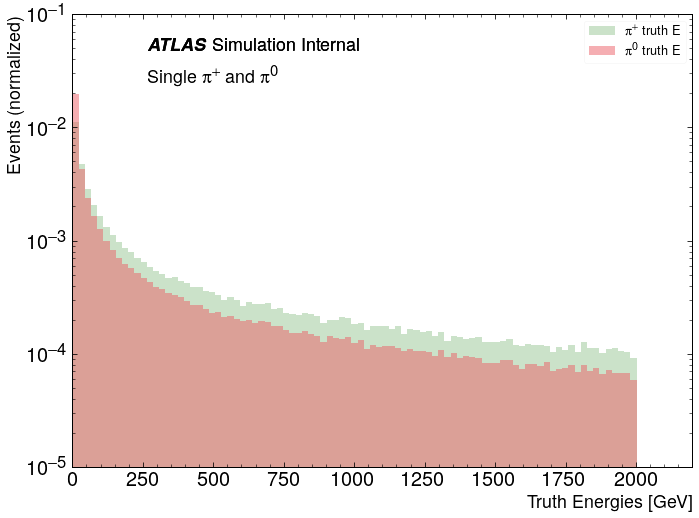

In [32]:
pu.histogramOverlay(frames = [pp, p0], #give 3 frames to plot (same here)
                    data =  ['truthE', 'truthE'], #vars to plot
                    labels =['$\pi^{+}$ truth E', '$\pi^{0}$ truth E'],
                    xlabel = 'Truth Energies [GeV]',
                    ylabel = 'Events (normalized)',
                    figfile = plotpath + '/truthEs.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

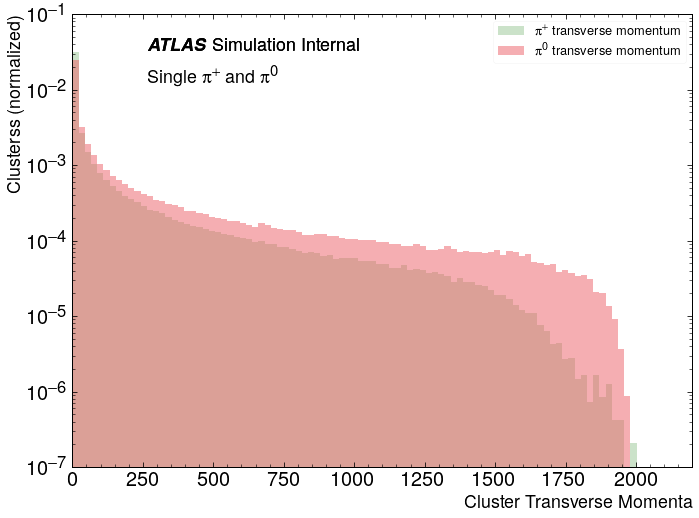

In [34]:
pu.histogramOverlay(frames = [pp, p0], #give 3 frames to plot (same here)
                    data =  ['clusterPt', 'clusterPt'], #vars to plot
                    labels =['$\pi^{+}$ transverse momentum', '$\pi^{0}$ transverse momentum'],
                    xlabel = 'Cluster Transverse Momenta',
                    ylabel = 'Clusterss (normalized)',
                    figfile = plotpath + '/Pts.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

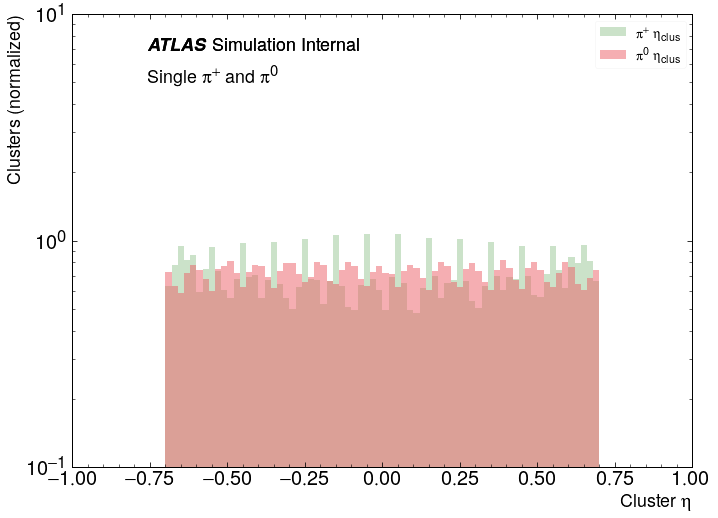

In [39]:
pu.histogramOverlay(frames = [pp, p0], #why is there periodicity here?????
                    data =  ['clusterEta', 'clusterEta'], #vars to plot
                    labels =['$\pi^{+}$ $\eta_{clus}$', '$\pi^{0}$ $\eta_{clus}$'],
                    xlabel = 'Cluster $\eta$',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/Etas.pdf',
                    x_min = -1, x_max = 1, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

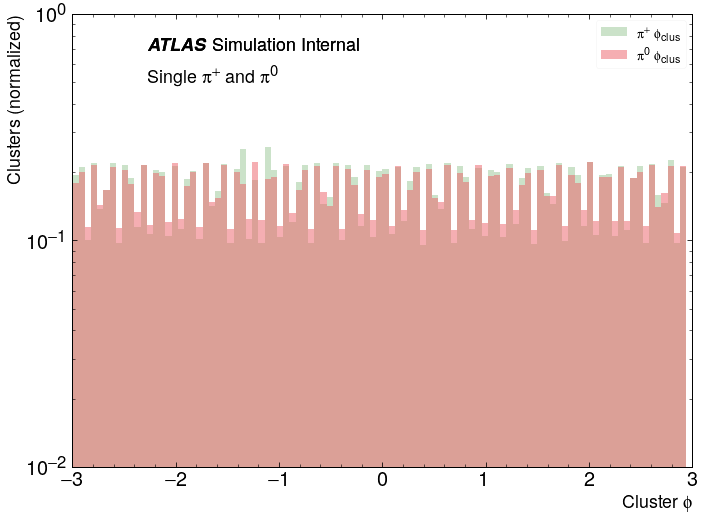

In [42]:
pu.histogramOverlay(frames = [pp, p0], #here as well kind of periodic
                    data =  ['clusterPhi', 'clusterPhi'], #vars to plot
                    labels =['$\pi^{+}$ $\phi_{clus}$', '$\pi^{0}$ $\phi_{clus}$'],
                    xlabel = 'Cluster $\phi$',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/Phis.pdf',
                    x_min = -3, x_max = 3, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

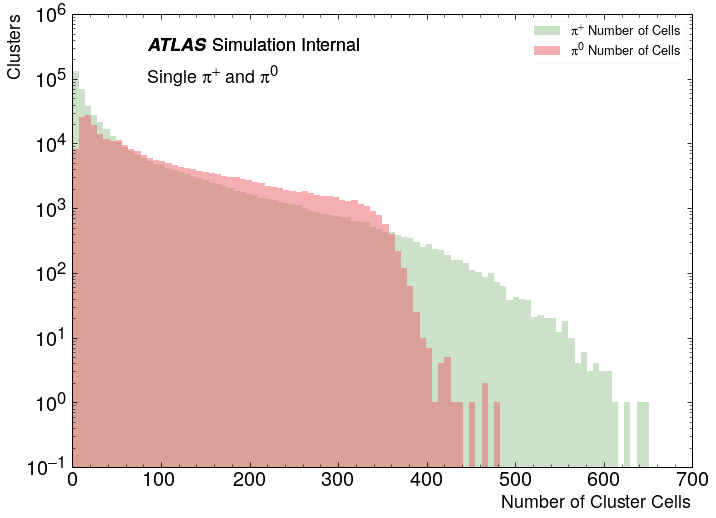

In [55]:
pu.histogramOverlay(frames = [pp, p0], #makes sense cause hadronic spread more, so would take up more cells!
                    data =  ['cluster_nCells', 'cluster_nCells'], #vars to plot
                    labels =['$\pi^{+}$ Number of Cells', '$\pi^{0}$ Number of Cells'],
                    xlabel = 'Number of Cluster Cells',
                    ylabel = 'Clusters',
                    figfile = plotpath + '/Ncells.pdf',
                    x_min = 0, x_max = 700, xbins = 100, normed = False, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

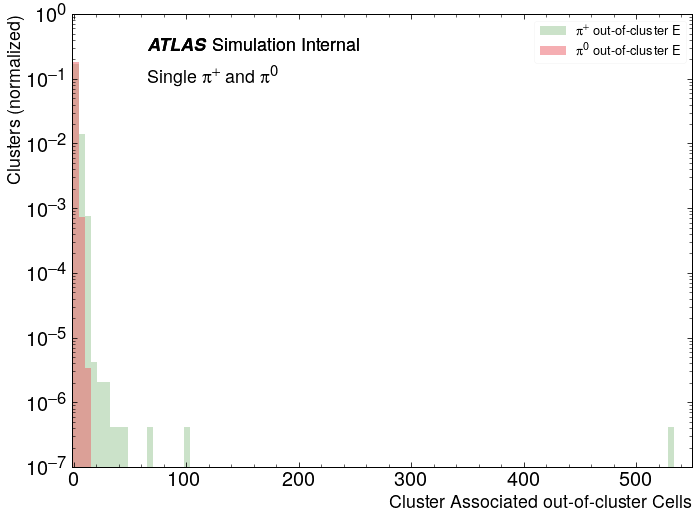

<Figure size 799.992x599.976 with 0 Axes>

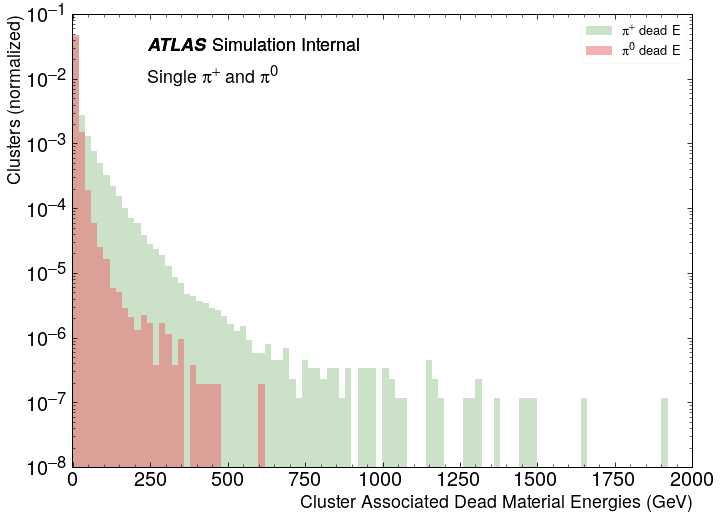

In [178]:
pu.histogramOverlay(frames = [pp, p0], 
                    data =  ['cluster_ENG_CALIB_OUT_T', 'cluster_ENG_CALIB_OUT_T'], #vars to plot
                    labels =['$\pi^{+}$ out-of-cluster E', '$\pi^{0}$ out-of-cluster E'],
                    xlabel = 'Cluster Associated out-of-cluster Cells',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/out.pdf',
                    x_min = -1, x_max = 550, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

pu.histogramOverlay(frames = [pp, p0], 
                    data =  ['cluster_ENG_CALIB_DEAD_TOT', 'cluster_ENG_CALIB_DEAD_TOT'], #vars to plot
                    labels =['$\pi^{+}$ dead E', '$\pi^{0}$ dead E'],
                    xlabel = 'Cluster Associated Dead Material Energies (GeV)',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/Etas.pdf',
                    x_min = -1, x_max = 2000, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

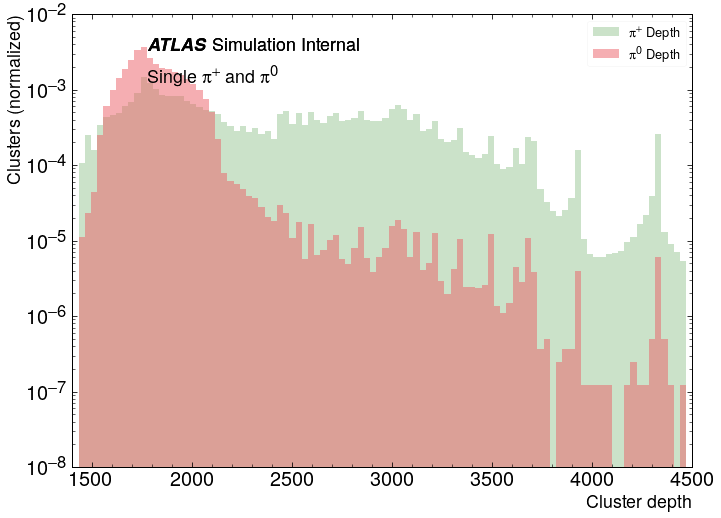

In [65]:
pu.histogramOverlay(frames = [pp, p0], 
                    data =  ['cluster_CENTER_MAG', 'cluster_CENTER_MAG'], #vars to plot
                    labels =['$\pi^{+}$ Depth', '$\pi^{0}$ Depth'],
                    xlabel = 'Cluster depth',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/depth.pdf',
                    x_min = 1400, x_max = 4500, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

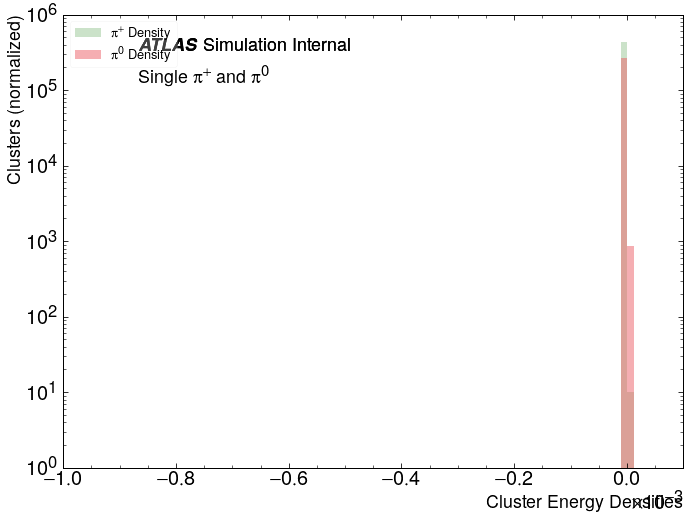

In [85]:
pu.histogramOverlay(frames = [pp, p0], #not sure this is useful
                    data =  ['cluster_FIRST_ENG_DENS', 'cluster_FIRST_ENG_DENS'], #vars to plot
                    labels =['$\pi^{+}$ Density', '$\pi^{0}$ Density'],
                    xlabel = 'Cluster Energy Densities',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/engdens.pdf',
                    x_min = -.001, x_max = .0001, xbins = 100, normed = False, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

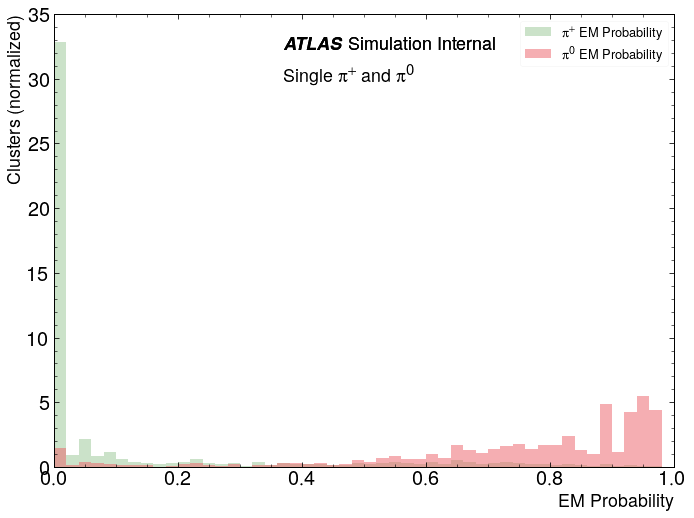

In [21]:
pu.histogramOverlay(frames = [pp, p0],
                    data =  ['cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY'],
                    labels =['$\pi^{+}$ EM Probability', '$\pi^{0}$ EM Probability'],
                    xlabel = 'EM Probability',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_emResponse_ppp0.pdf',#****** nice !!!
                    x_min = 0, x_max = 1, xbins = 50, normed = True, y_log = False,
                    atlas_x = 0.37, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.37, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

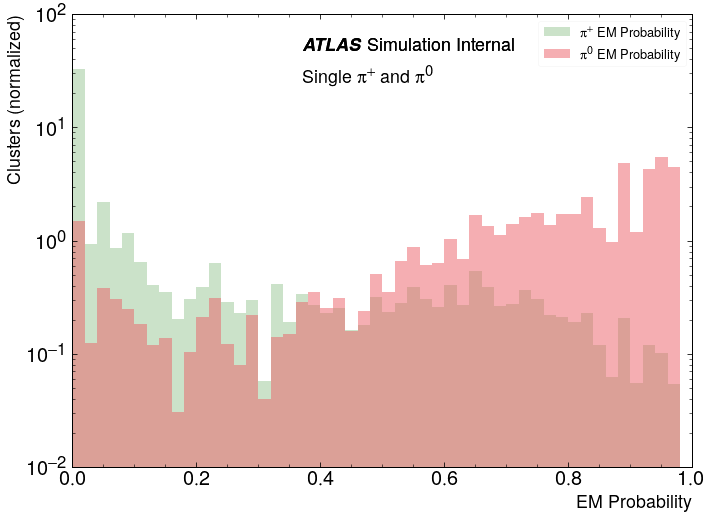

In [23]:
pu.histogramOverlay(frames = [pp, p0],
                    data =  ['cluster_EM_PROBABILITY', 'cluster_EM_PROBABILITY'],
                    labels =['$\pi^{+}$ EM Probability', '$\pi^{0}$ EM Probability'],
                    xlabel = 'EM Probability',
                    ylabel = 'Clusters (normalized)',
                    figfile = plotpath + '/hist_emResponse_ppp0.pdf',#****** nice !!!
                    x_min = 0, x_max = 1, xbins = 50, normed = True, y_log = True,
                    atlas_x = 0.37, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.37, 'y': 0.85, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])

<Figure size 799.992x599.976 with 0 Axes>

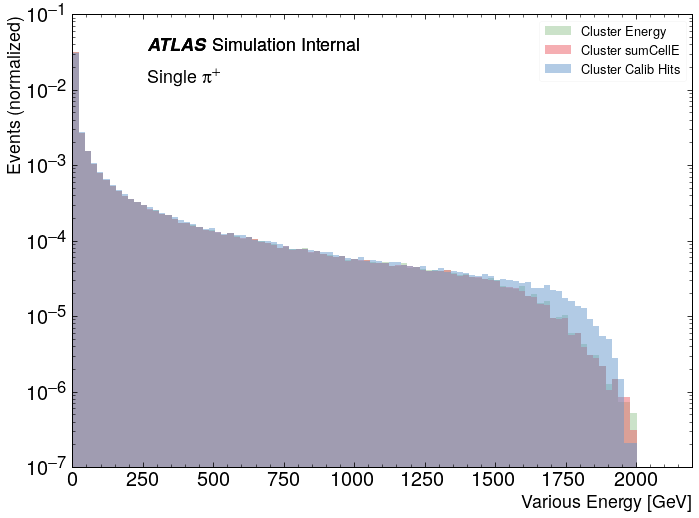

In [25]:
pu.histogramOverlay(frames = [pp, pp, pp], #give 3 frames to plot (same here)
                    data =  ['clusterE', 'cluster_sumCellE', 'cluster_ENG_CALIB_TOT'], #vars to plot
                    labels =['Cluster Energy', 'Cluster sumCellE', 'Cluster Calib Hits'],
                    xlabel = 'Various Energy [GeV]',
                    ylabel = 'Events (normalized)',
                    figfile = plotpath + '/hist_energy.pdf',
                    x_min = 0, x_max = 2200, xbins = 100, normed = True, y_log = True,
                    atlas_x = 0.12, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.12, 'y': 0.85, 'text': 'Single $\pi^{+}$'}])

### plot E dens vs depth like fig 10

In [161]:
x = pp.cluster_FIRST_ENG_DENS
y = pp.cluster_CENTER_MAG#/pp.cluster_ENG_CALIB_TOT

min(x)

0.0

<Figure size 799.992x599.976 with 0 Axes>

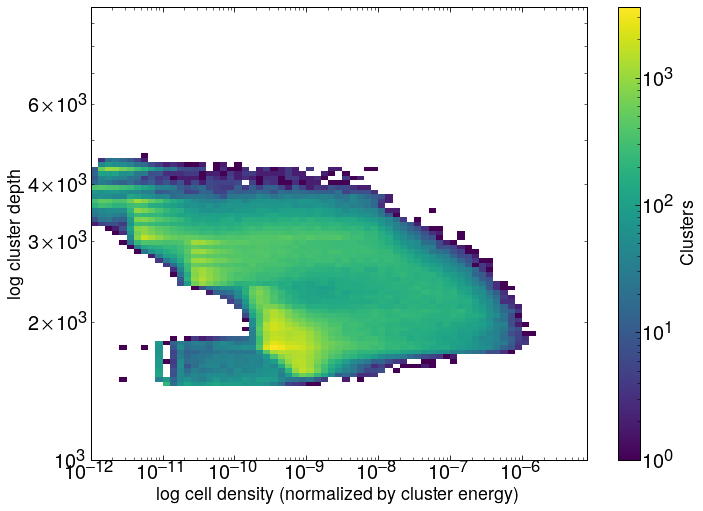

In [171]:
x = pp.cluster_FIRST_ENG_DENS
y = pp.cluster_CENTER_MAG#/pp.cluster_ENG_CALIB_TOT

xbin = [10**exp for exp in np.arange(-12, -5, .1)]
ybin = [10**exp for exp in np.arange(3, 4, .01)]
xcenter = [(xbin[i] + xbin[i+1]) / 2 for i in range(len(xbin)-1)]

plt.cla()
plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(x, y, bins=[xbin, ybin], norm=LogNorm(),zorder = -1)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar()
cb.ax.set_ylabel('Clusters')
plt.xlabel('log cell density (normalized by cluster energy)')
plt.ylabel('log cluster depth')
plt.savefig('./Plots/fig10attempt')

<Figure size 799.992x599.976 with 0 Axes>

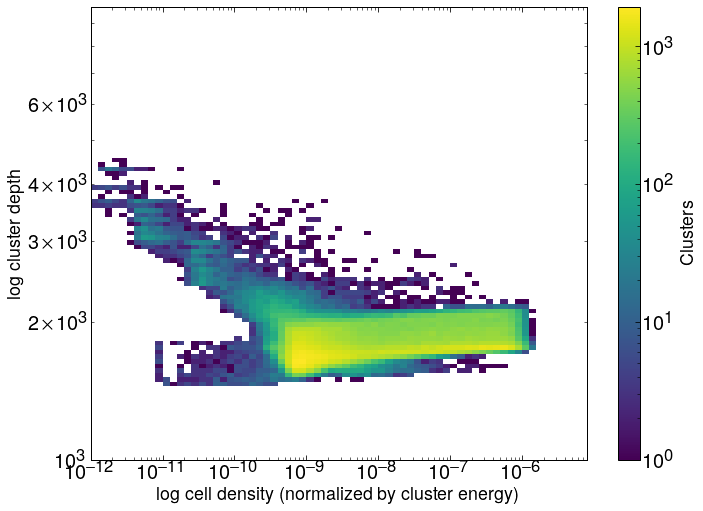

In [172]:
x = p0.cluster_FIRST_ENG_DENS
y = p0.cluster_CENTER_MAG

xbin = [10**exp for exp in np.arange(-12, -5, .1)]
ybin = [10**exp for exp in np.arange(3, 4, .01)]
xcenter = [(xbin[i] + xbin[i+1]) / 2 for i in range(len(xbin)-1)]

plt.cla()
plt.clf()
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist2d(x, y, bins=[xbin, ybin], norm=LogNorm(),zorder = -1)
plt.xscale('log')
plt.yscale('log')
cb = plt.colorbar()
cb.ax.set_ylabel('Clusters')
plt.xlabel('log cell density (normalized by cluster energy)')
plt.ylabel('log cluster depth')
plt.savefig('./Plots/fig10forp0')

### plot pi0 response

<Figure size 799.992x599.976 with 0 Axes>

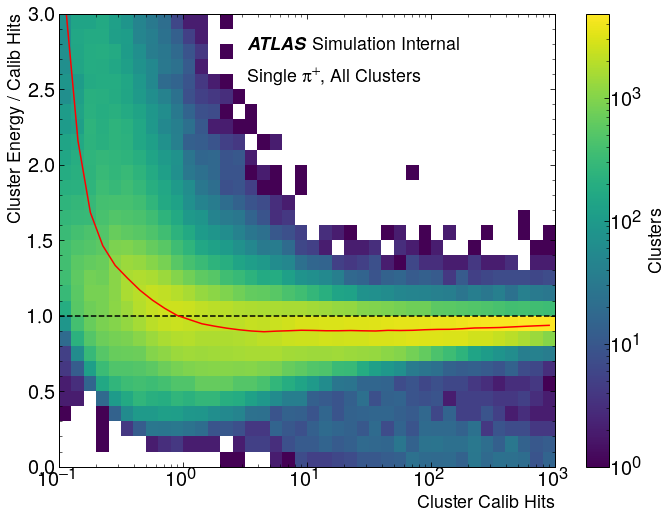

In [90]:
xcenter, medAll = ru.responsePlot(pp.cluster_ENG_CALIB_TOT, pp.clusterEoverCalib, #x, y
                    figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile.pdf', statistic = 'median',
                    atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.38, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])
#pi+ for comparison

<Figure size 799.992x599.976 with 0 Axes>

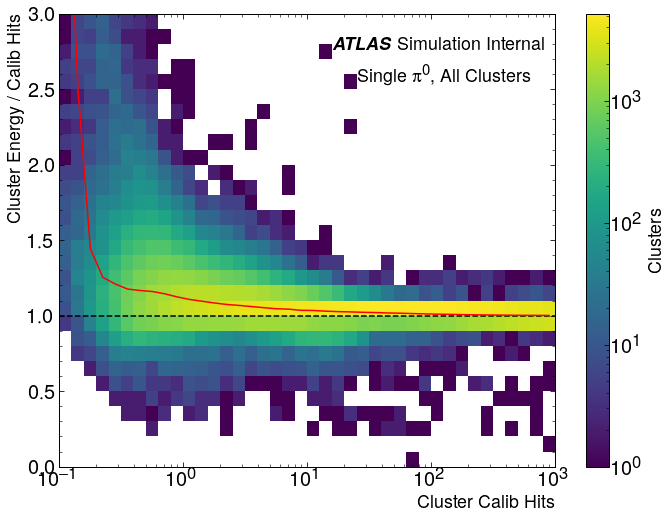

In [103]:
xcenter0, medAll0 = ru.responsePlot(p0.cluster_ENG_CALIB_TOT, p0.clusterEoverCalib, #x, y
                    figfile = plotpath+'hist_2D_calib_vs_ratio_p0_profile.pdf', statistic = 'median',
                    atlas_x = 0.55, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.60, 'y': 0.85, 'text': 'Single $\pi^{0}$, All Clusters'}])
#pi0 - much narrower and goes right to 1 as predicted! measured E is quite accurate right off the bat for pi0**

### plot pi+ response using LCE

In [97]:
pp['cluster_LCE'] = pp.clusterE * pp.cluster_HAD_WEIGHT
pp['clusterLCEoverCalib'] = pp.cluster_LCE / pp.cluster_ENG_CALIB_TOT #I think this is it !!! Gives good plot ayyy

pp.cluster_LCE

0         1748.795532
1           69.358177
2            0.423397
3           13.995656
4            0.441854
             ...     
435962       2.999295
435963      16.091053
435964      47.240479
435965       5.818182
435966       1.625942
Name: cluster_LCE, Length: 435967, dtype: float32

<Figure size 799.992x599.976 with 0 Axes>

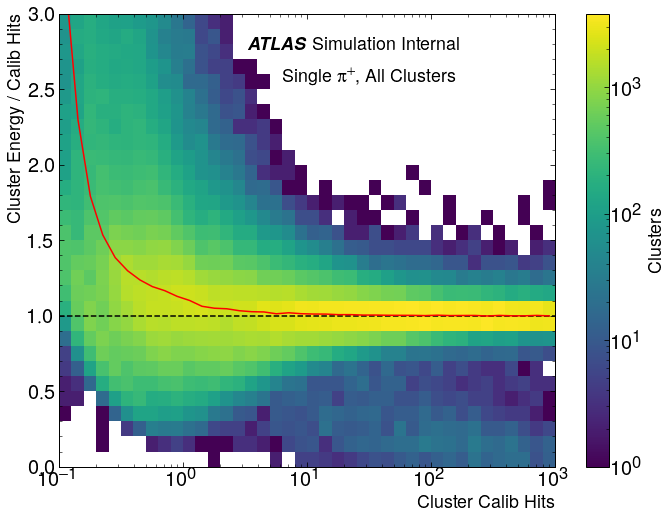

In [99]:
xcenter, medAll = ru.responsePlot(pp.cluster_ENG_CALIB_TOT, pp.clusterLCEoverCalib, #x, y
                    figfile = plotpath+'hist_2D_calib_vs_ratio_pp_profile.pdf', statistic = 'median',
                    atlas_x = 0.38, atlas_y = 0.95, simulation = True,
                    textlist = [{'x': 0.45, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])
#not much narrower but now goes to 1 like we want!! (remind me why?)

### trying resolution plots

<Figure size 799.992x599.976 with 0 Axes>

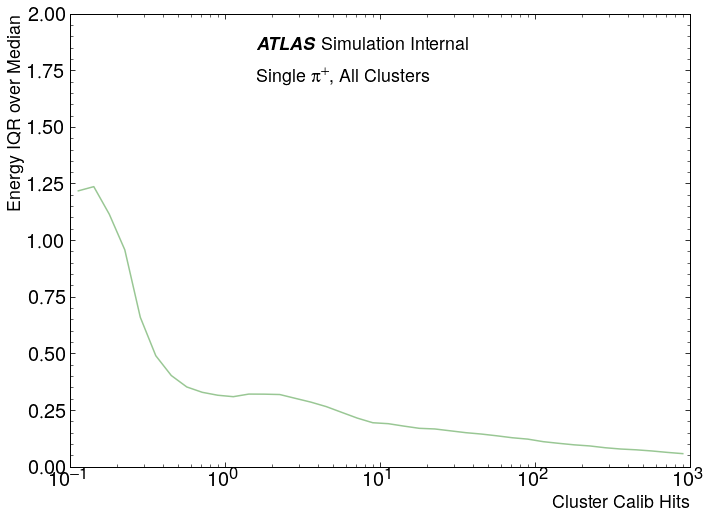

In [107]:
xcenter, iqrOverMedAll = ru.resolutionPlot(pp.cluster_ENG_CALIB_TOT, pp.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])

<Figure size 799.992x599.976 with 0 Axes>

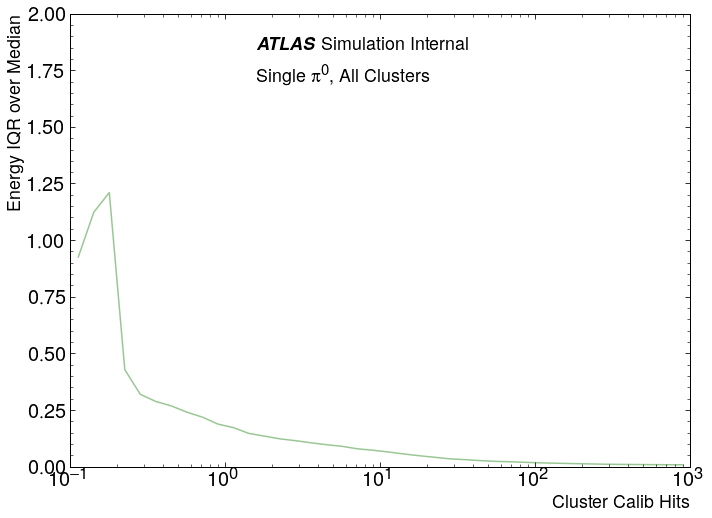

In [105]:
xcenter0, iqrOverMedAll0 = ru.resolutionPlot(p0.cluster_ENG_CALIB_TOT, p0.clusterEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_p0_iqrMed.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{0}$, All Clusters'}])

<Figure size 799.992x599.976 with 0 Axes>

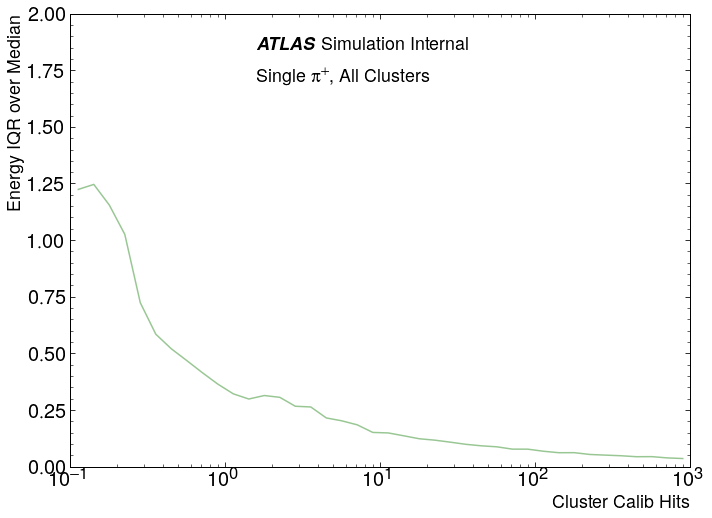

In [108]:
xcenterLCE, iqrOverMedAllLCE = ru.resolutionPlot(pp.cluster_ENG_CALIB_TOT, pp.clusterLCEoverCalib,
                            plotpath+'hist_2D_calib_vs_ratio_pp_iqrMed_LCE.pdf', 
                            statistic='iqrOverMed',
                            atlas_x = 0.3, atlas_y = 0.95, simulation = True,
                            textlist = [{'x': 0.3, 'y': 0.85, 'text': 'Single $\pi^{+}$, All Clusters'}])

### compare the three resolution plots

<Figure size 799.992x599.976 with 0 Axes>

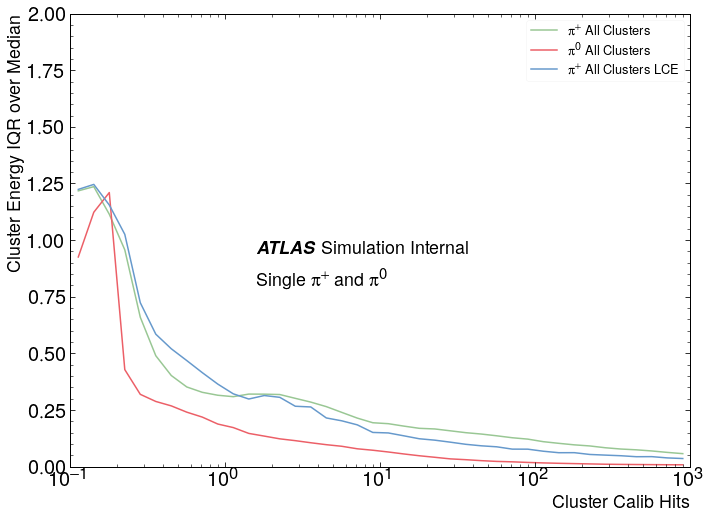

In [109]:
pu.lineOverlay(xcenter=xcenter, lines = [iqrOverMedAll, iqrOverMedAll0, iqrOverMedAllLCE],
                labels=['$\pi^{+}$ All Clusters', '$\pi^{0}$ All Clusters', '$\pi^{+}$ All Clusters LCE'],
                xlabel = 'Cluster Calib Hits', ylabel = 'Cluster Energy IQR over Median',
                figfile = plotpath + 'hist_2D_calib_vs_ratio_ppp0_iqrMed_Overlay.pdf',
                x_min = 0.1, x_max = 1000, x_log = True,
                y_min = 0, y_max=2, y_log=False,
                atlas_x = 0.3, atlas_y = 0.5, simulation = True,
                textlist = [{'x': 0.3, 'y': 0.4, 'text': 'Single $\pi^{+}$ and $\pi^{0}$'}])